# DS 7333 - Quantifying the World
## Case Study #6: "Searching for Exotic Particles in High-Energy Physics with Deep Learning"¶

Sterling Beason, Sean Kennedy, Emil Ramos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# modeling
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
# sklearn helpers
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
print(tf.__version__)

2.3.0


### Import Data (subset)

In [3]:
# import data
nrows = 1000000
data = pd.read_csv("./data/HIGGS.csv", nrows=nrows, header=None)
data[0] = data[0].astype(int)
print(f"Using {nrows} rows of entire dataset")

Using 1000000 rows of entire dataset


### Partition Data

Low-level features

In [4]:
# Partition data
X = data.iloc[:,range(1,22)].values
y = data[0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7333)

### Build Model

**https://arxiv.org/pdf/1402.4735.pdf** 

(pg. 6)
>We selected a five-layer neural
network with 300 hidden units in each layer, a learning
rate of 0.05, and a weight decay coefficient of 1 × 10−5.

(pg. 9, Methods)
>Hidden units all used the tanh activation function.
Weights were initialized from a normal distribution with
zero mean and standard deviation 0.1 in the first layer,
0.001 in the output layer, and 0.05 all other hidden layers

In [5]:
# model
#tf.keras.backend.set_floatx('float64')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['accuracy']
)

### Train Model

**https://arxiv.org/pdf/1402.4735.pdf**

(pg. 9, Methods)
>  Gradient computations were made on mini-batches
of size 100. A momentum term increased linearly over
the first 200 epochs from 0.9 to 0.99, at which point it
remained constant.

In [6]:
# early stopping callback
es = EarlyStopping(monitor = "accuracy", min_delta = 0.01, patience = 4)

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    callbacks=[es],
    epochs=200, 
    batch_size=100
)

Epoch 1/200
8000/8000 [==============================] - 24s 3ms/step - loss: 0.2379 - accuracy: 0.5863 - val_loss: 0.2326 - val_accuracy: 0.6077
Epoch 2/200
8000/8000 [==============================] - 22s 3ms/step - loss: 0.2307 - accuracy: 0.6116 - val_loss: 0.2278 - val_accuracy: 0.6222
Epoch 3/200
8000/8000 [==============================] - 22s 3ms/step - loss: 0.2276 - accuracy: 0.6210 - val_loss: 0.2271 - val_accuracy: 0.6234
Epoch 4/200
8000/8000 [==============================] - 22s 3ms/step - loss: 0.2251 - accuracy: 0.6286 - val_loss: 0.2231 - val_accuracy: 0.6362
Epoch 5/200
8000/8000 [==============================] - 22s 3ms/step - loss: 0.2227 - accuracy: 0.6352 - val_loss: 0.2231 - val_accuracy: 0.6349
Epoch 6/200
8000/8000 [==============================] - 22s 3ms/step - loss: 0.2205 - accuracy: 0.6409 - val_loss: 0.2198 - val_accuracy: 0.6433
Epoch 7/200
8000/8000 [==============================] - 22s 3ms/step - loss: 0.2184 - accuracy: 0.6461 - val_loss: 0.2200 -

#### Train/Loss Plot

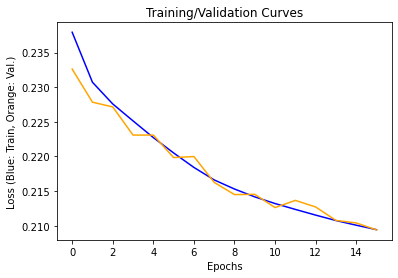

In [7]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.ylabel('Loss (Blue: Train, Orange: Val.)')
plt.xlabel('Epochs')
plt.title('Training/Validation Curves')
plt.show()

### Evaluate Model

#### Accuracy

In [8]:
model_scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', model_scores[1])

Accuracy: 0.6692299842834473


#### AUC

In [10]:
predictions = model.predict(X_test).ravel() # predictions
fpr, tpr, thresholds = roc_curve(y_test, predictions) # ROC
auc_metric = auc(fpr, tpr) # finally AUC
print(f"AUC: {auc_metric}")

AUC: 0.7308512130145483
